In [9]:
import pandas as pd

#Import data csv file
import pandas as pd
c = pd.read_csv(r'C:\Users\Asus\Downloads\Full_tape.csv')
c = pd.DataFrame(c)
c.head

<bound method NDFrame.head of          Unnamed: 0              0          1          2    3  \
0                 0  Tst2022-01-04   Exch0Lit      8.192  203   
1                 1  Tst2022-01-04   Exch0Lit      8.192  199   
2                 2  Tst2022-01-04   Exch0Lit     10.336  196   
3                 3  Tst2022-01-04   Exch0Lit     10.672  196   
4                 4  Tst2022-01-04   Exch0Lit     11.040  201   
...             ...            ...        ...        ...  ...   
5230359       64888  Tst2022-04-29   Exch0Lit  30599.376  134   
5230360       64889  Tst2022-04-29   Exch0Lit  30599.520  134   
5230361       64890  Tst2022-04-29   Exch0Lit  30599.584  134   
5230362       64891  Tst2022-04-29   Exch0Lit  30599.776  134   
5230363       64892  Tst2022-04-29   Exch0Lit  30599.776  133   

                               4                 5                   6  \
0         {'pool_id': 'Exch0Lit'   'type': 'Trade'       'time': 8.192   
1         {'pool_id': 'Exch0Lit'   'type'

In [15]:
#Drop columns that are not needed
df = c.drop(columns=['1','2', '3', '4', '5', '9', '10'])

#Naming columns
df = df.rename(columns={'0': 'Date', '6': 'Time', '7': 'Price', '8': 'Quantity'})

In [16]:
df.head()

,Unnamed: 0,Date,Time,Price,Quantity
0,0,Tst2022-01-04,'time': 8.192,'price': 203,'qty': 2
1,1,Tst2022-01-04,'time': 8.192,'price': 199,'qty': 3
2,2,Tst2022-01-04,'time': 10.336,'price': 196,'qty': 3
3,3,Tst2022-01-04,'time': 10.672,'price': 196,'qty': 4
4,4,Tst2022-01-04,'time': 11.04,'price': 201,'qty': 1


In [17]:
#Function to clean contents in dataframe
def clean(x):
    x = x.replace("Tst", "").replace("'type':", "").replace("'time':", "").replace("'price':", "").replace("'qty':", "").replace("'", "").replace("'", "")
    return str(x)

In [19]:
#Apply clean function to get cleaned dataframe
df['Date'] = df['Date'].apply(clean)
df['Time'] = df['Time'].apply(clean)
df['Price'] = df['Price'].apply(clean)
df['Quantity'] = df['Quantity'].apply(clean)
df[["Time", "Price"]] = df[["Time", "Price"]].apply(pd.to_numeric)
df.head()

,Unnamed: 0,Date,Time,Price,Quantity
0,0,2022-01-04,8.192,203,2
1,1,2022-01-04,8.192,199,3
2,2,2022-01-04,10.336,196,3
3,3,2022-01-04,10.672,196,4
4,4,2022-01-04,11.040,201,1


In [66]:
# new data frame with split value columns
new = df["Date"].str.split("-", n = 2, expand = True)
  
# making separate first name column from new data frame
df['Y'] = new[0]
# making separate last name column from new data frame
df['M'] = new[1]
df['D'] = new[2]

df[["Y", "M","D"]] = df[["Y", "M","D"]].apply(pd.to_numeric)

In [59]:
import datetime

In [67]:
#Create datetime column based on  given Time column
from datetime import datetime, timedelta
from datetime import datetime, datetime

dt = []
for i in range(len(df)):
    start = datetime(df['Y'][i], df['M'][i], df['D'][i], 8, 0, 0) #start time when market opens
    dt.append(start + timedelta(seconds = df["Time"][i]))

df['DateTime'] = dt
df.head()

,Unnamed: 0,Date,Time,Price,Quantity,DateTime,Y,M,D
0,0,2022-01-04,8.192,203,2,2022-01-04 08:00:08.192,2022,1,4
1,1,2022-01-04,8.192,199,3,2022-01-04 08:00:08.192,2022,1,4
2,2,2022-01-04,10.336,196,3,2022-01-04 08:00:10.336,2022,1,4
3,3,2022-01-04,10.672,196,4,2022-01-04 08:00:10.672,2022,1,4
4,4,2022-01-04,11.040,201,1,2022-01-04 08:00:11.040,2022,1,4


In [113]:
#High, low, open and close prices for every 5 minutes interval
prices = df.resample('5H', on='DateTime').Price.agg(['min','max', 'first','last'])
prices.reset_index(inplace=True)
prices

,DateTime,min,max,first,last
0,2022-01-04 05:00:00,179.0,221.0,203.0,189.0
1,2022-01-04 10:00:00,189.0,233.0,189.0,203.0
2,2022-01-04 15:00:00,199.0,238.0,203.0,219.0
3,2022-01-04 20:00:00,NaN,NaN,NaN,NaN
4,2022-01-05 01:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
550,2022-04-28 19:00:00,NaN,NaN,NaN,NaN
551,2022-04-29 00:00:00,NaN,NaN,NaN,NaN
552,2022-04-29 05:00:00,105.0,136.0,135.0,105.0
553,2022-04-29 10:00:00,104.0,136.0,105.0,135.0


In [114]:
prices.dropna(subset=['min'], inplace=True)

In [115]:
#Plot candlestick chart
##Reference: https://plotly.com/python/candlestick-charts/

import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=prices['DateTime'],
                open=prices['first'],
                high=prices['max'],
                low=prices['min'],
                close=prices['last'])])

fig.show()

In [116]:
#Moving average and Exponential Moving Average lines

prices['MA5'] = prices['last'].rolling(5).mean()
prices['MA20'] = prices['last'].rolling(20).mean()


# plot the candlesticks
fig0 = go.Figure(data=[go.Candlestick(x=prices['DateTime'],
                                    open=prices['first'],
                                    high=prices['max'],
                                    low=prices['min'],
                                    close=prices['last']), 
                      go.Scatter(x=prices.DateTime, y=prices.MA5, line=dict(color='black', width=1),name='MA 5'),
                      go.Scatter(x=prices.DateTime, y=prices.MA20, line=dict(color='blue', width=1),name='MA 20')])

fig0

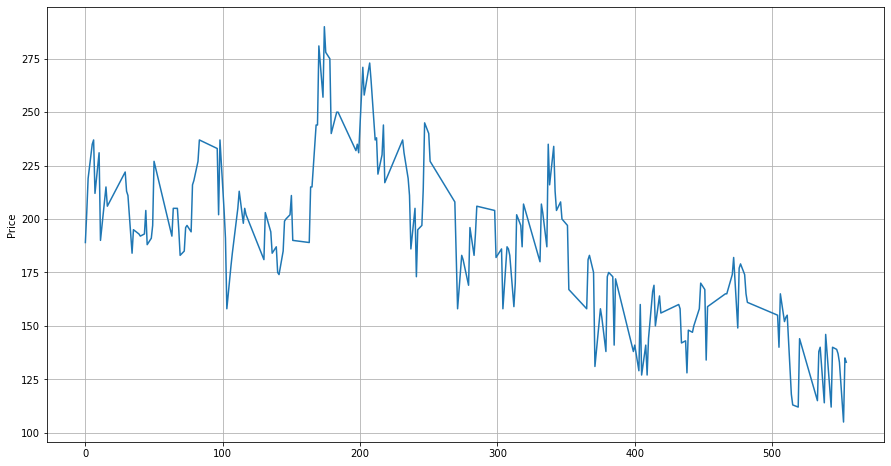

In [117]:
import matplotlib.pyplot as plt
prices['last'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

In [122]:
# create 20 days simple moving average column
prices['20_SMA'] = prices['last'].rolling(window = 20, min_periods = 1).mean()# create 50 days simple moving average column
prices['50_SMA'] = prices['last'].rolling(window = 5, min_periods = 1).mean()# display first few rows
prices.head()

,DateTime,min,max,first,last,MA5,MA20,20_SMA,50_SMA,Signal,Position
0,2022-01-04 05:00:00,179.0,221.0,203.0,189.0,NaN,NaN,189.000000,189.000000,0.0,NaN
1,2022-01-04 10:00:00,189.0,233.0,189.0,203.0,NaN,NaN,196.000000,196.000000,0.0,0.0
2,2022-01-04 15:00:00,199.0,238.0,203.0,219.0,NaN,NaN,203.666667,203.666667,0.0,0.0
5,2022-01-05 06:00:00,196.0,238.0,219.0,235.0,NaN,NaN,211.500000,211.500000,0.0,0.0
6,2022-01-05 11:00:00,199.0,240.0,232.0,237.0,216.6,NaN,216.600000,216.600000,0.0,0.0


In [123]:
import numpy as np
prices['Signal'] = 0.0
prices['Signal'] = np.where(prices['20_SMA'] > prices['50_SMA'], 1.0, 0.0)

In [124]:
prices['Position'] = prices['Signal'].diff()# display first few rows
prices.head()

,DateTime,min,max,first,last,MA5,MA20,20_SMA,50_SMA,Signal,Position
0,2022-01-04 05:00:00,179.0,221.0,203.0,189.0,NaN,NaN,189.000000,189.000000,0.0,NaN
1,2022-01-04 10:00:00,189.0,233.0,189.0,203.0,NaN,NaN,196.000000,196.000000,0.0,0.0
2,2022-01-04 15:00:00,199.0,238.0,203.0,219.0,NaN,NaN,203.666667,203.666667,0.0,0.0
5,2022-01-05 06:00:00,196.0,238.0,219.0,235.0,NaN,NaN,211.500000,211.500000,0.0,0.0
6,2022-01-05 11:00:00,199.0,240.0,232.0,237.0,216.6,NaN,216.600000,216.600000,0.0,0.0


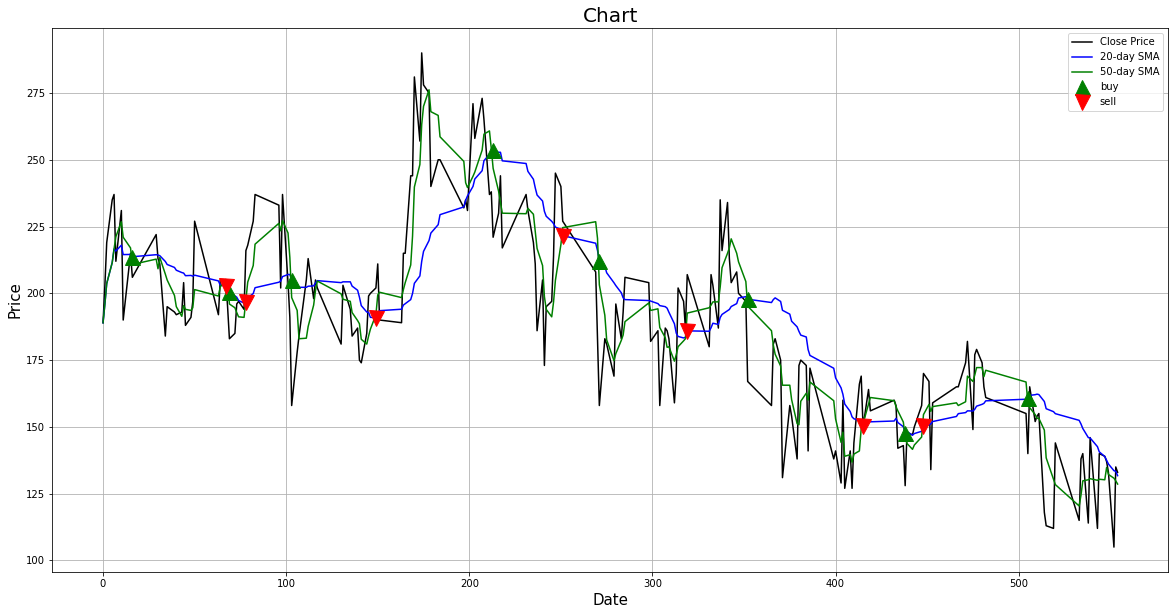

In [125]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
prices['last'].plot(color = 'k', label= 'Close Price') 
prices['20_SMA'].plot(color = 'b',label = '20-day SMA') 
prices['50_SMA'].plot(color = 'g', label = '50-day SMA')# plot ‘buy’ signals
plt.plot(prices[prices['Position'] == 1].index, 
         prices['20_SMA'][prices['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')# plot ‘sell’ signals
plt.plot(prices[prices['Position'] == -1].index, 
         prices['20_SMA'][prices['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

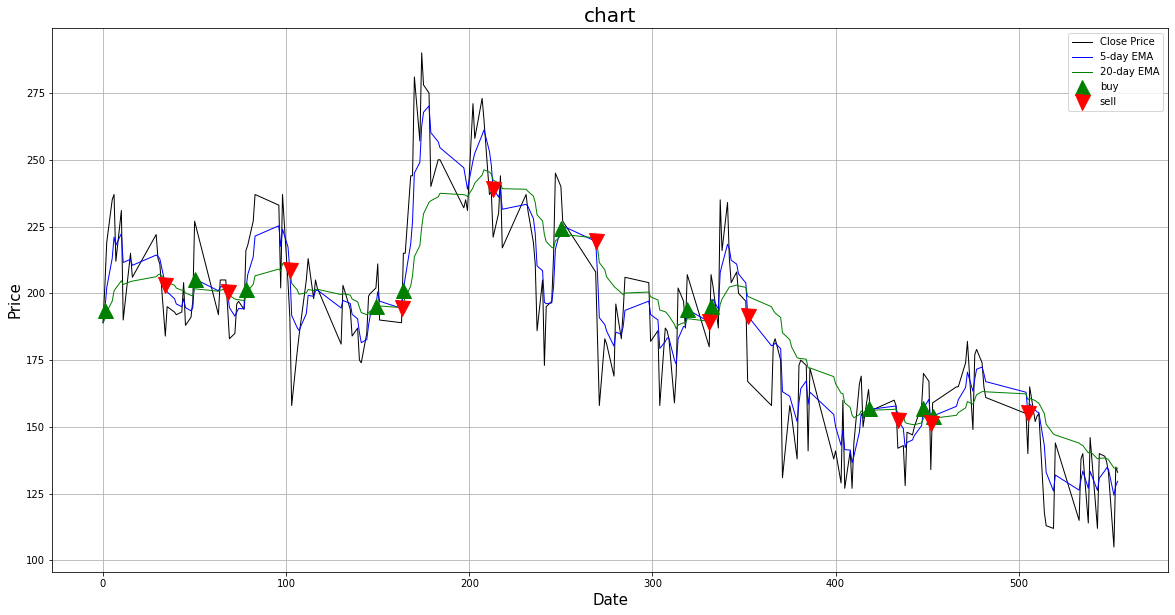

In [131]:
# set start and end dates

prices['5_EMA'] = prices['last'].ewm(span = 5, adjust = False).mean()# Create 50 days exponential moving average column
prices['20_EMA'] = prices['last'].ewm(span = 20, adjust = False).mean()# create a new column 'Signal' such that if 20-day EMA is greater   # than 50-day EMA then set Signal as 1 else 0
  
prices['Signal'] = 0.0  
prices['Signal'] = np.where(prices['5_EMA'] > prices['20_EMA'], 1.0, 0.0)# create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
prices['Position'] = prices['Signal'].diff()
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
prices['last'].plot(color = 'k', lw = 1, label = 'Close Price')  
prices['5_EMA'].plot(color = 'b', lw = 1, label = '5-day EMA') 
prices['20_EMA'].plot(color = 'g', lw = 1, label = '20-day EMA')
# plot ‘buy’ and 'sell' signals
plt.plot(prices[prices['Position'] == 1].index, 
         prices['5_EMA'][prices['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(prices[prices['Position'] == -1].index, 
         prices['5_EMA'][prices['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

# Anytrading Trading Gym RL

In [138]:
class StockEnvTrain(gym.Env):
    metadata = {'render.modes': ['human']}
def __init__(self, df, day = 0):
    self.day = day
    self.df = df
    # Action Space
    # action_space normalization and shape is STOCK_DIM
    self.action_space = spaces.Box(low = -1, high = 1,shape = (STOCK_DIM,)) 
 
    # State Space
    # Shape = 181: [Current Balance]+[prices 1–30]+[owned shares 1–30] 
    # +[macd 1–30]+ [rsi 1–30] + [cci 1–30] + [adx 1–30]
    self.observation_space = spaces.Box(low=0, high=np.inf, shape = (181,))
    # load data from a pandas dataframe
    self.data = self.df.loc[self.day,:]
    self.terminal = False 
    # initalize state
    self.state = [INITIAL_ACCOUNT_BALANCE] + \
    self.data.adjcp.values.tolist() + \
    [0]*STOCK_DIM + \
    self.data.macd.values.tolist() + \
    self.data.rsi.values.tolist() + \
    self.data.cci.values.tolist() + \
    self.data.adx.values.tolist()
    # initialize reward
    self.reward = 0
    self.cost = 0
    # memorize all the total balance change
    self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
    self.rewards_memory = []
    self.trades = 0
    #self.reset()
    self._seed()

NameError: name 'gym' is not defined

# Failed

In [ ]:
pip install ta

In [ ]:
import pandas_ta as ta
from ta.trend import MACD
macd = ta.macd(prices['last'])
macd

In [ ]:
data = pd.concat([prices, macd], axis=1).reindex(prices.index)
data

In [ ]:
import numpy as np

def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['last'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['last'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['last'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["last"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['last'][i] < df['last'][i - 1] * (1 - risk):
            MACD_Sell.append(df["last"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell

In [ ]:
MACD_strategy = MACD_Strategy(data, 0.025)
data

In [ ]:
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

data['positive'] = MACD_color(data)
data

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle('hi', fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Adj Close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index,'MACDh_12_26_9', data=data, label='Volume', width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()
